In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
file_path = 'data/train.csv'

df_train = pd.read_csv(file_path)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [6]:
# Separate the features and the target variable
X = df_train.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = df_train['SalePrice']               # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1998
)

In [7]:
# Checking the percentage of missing value oneach columns

missing_values = X_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(X_train)) * 100

print(missing_percentage)

LotFrontage     16.866438
Alley           93.835616
MasVnrType      59.760274
MasVnrArea       0.684932
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
Electrical       0.085616
FireplaceQu     47.174658
GarageType       4.794521
GarageYrBlt      4.794521
GarageFinish     4.794521
GarageQual       4.794521
GarageCond       4.794521
PoolQC          99.571918
Fence           80.222603
MiscFeature     95.976027
dtype: float64


In [8]:
# Checking columns that have many missing data

columns_to_drop = missing_percentage[missing_percentage > 30].index

X_train.drop(columns=columns_to_drop, inplace=True)

print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
768    769          20       RL         70.0     9100   Pave      Reg   
1102  1103          20       RL         70.0     7000   Pave      Reg   
816    817          20       RL          NaN    11425   Pave      IR1   
391    392          60       RL         71.0    12209   Pave      IR1   
747    748          70       RM         65.0    11700   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
224    225          20       RL        103.0    13472   Pave      Reg   
1188  1189          60       RL         68.0     8935   Pave      IR1   
897    898          90       RL         64.0     7018   Pave      Reg   
673    674          20       RL        110.0    14442   Pave      Reg   
840    841          70       RH          NaN    12155   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
768          Lvl    AllPub    Inside  ... 

In [9]:
columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [10]:
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:

        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
df_train.head()

/tmp/ipykernel_288180/2233020574.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].mean(), inplace=True)
/tmp/ipykernel_288180/2233020574.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
X_train.isnull().sum().sum()


0

In [12]:
X_train.drop(columns=['Id'], inplace=True)


In [13]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

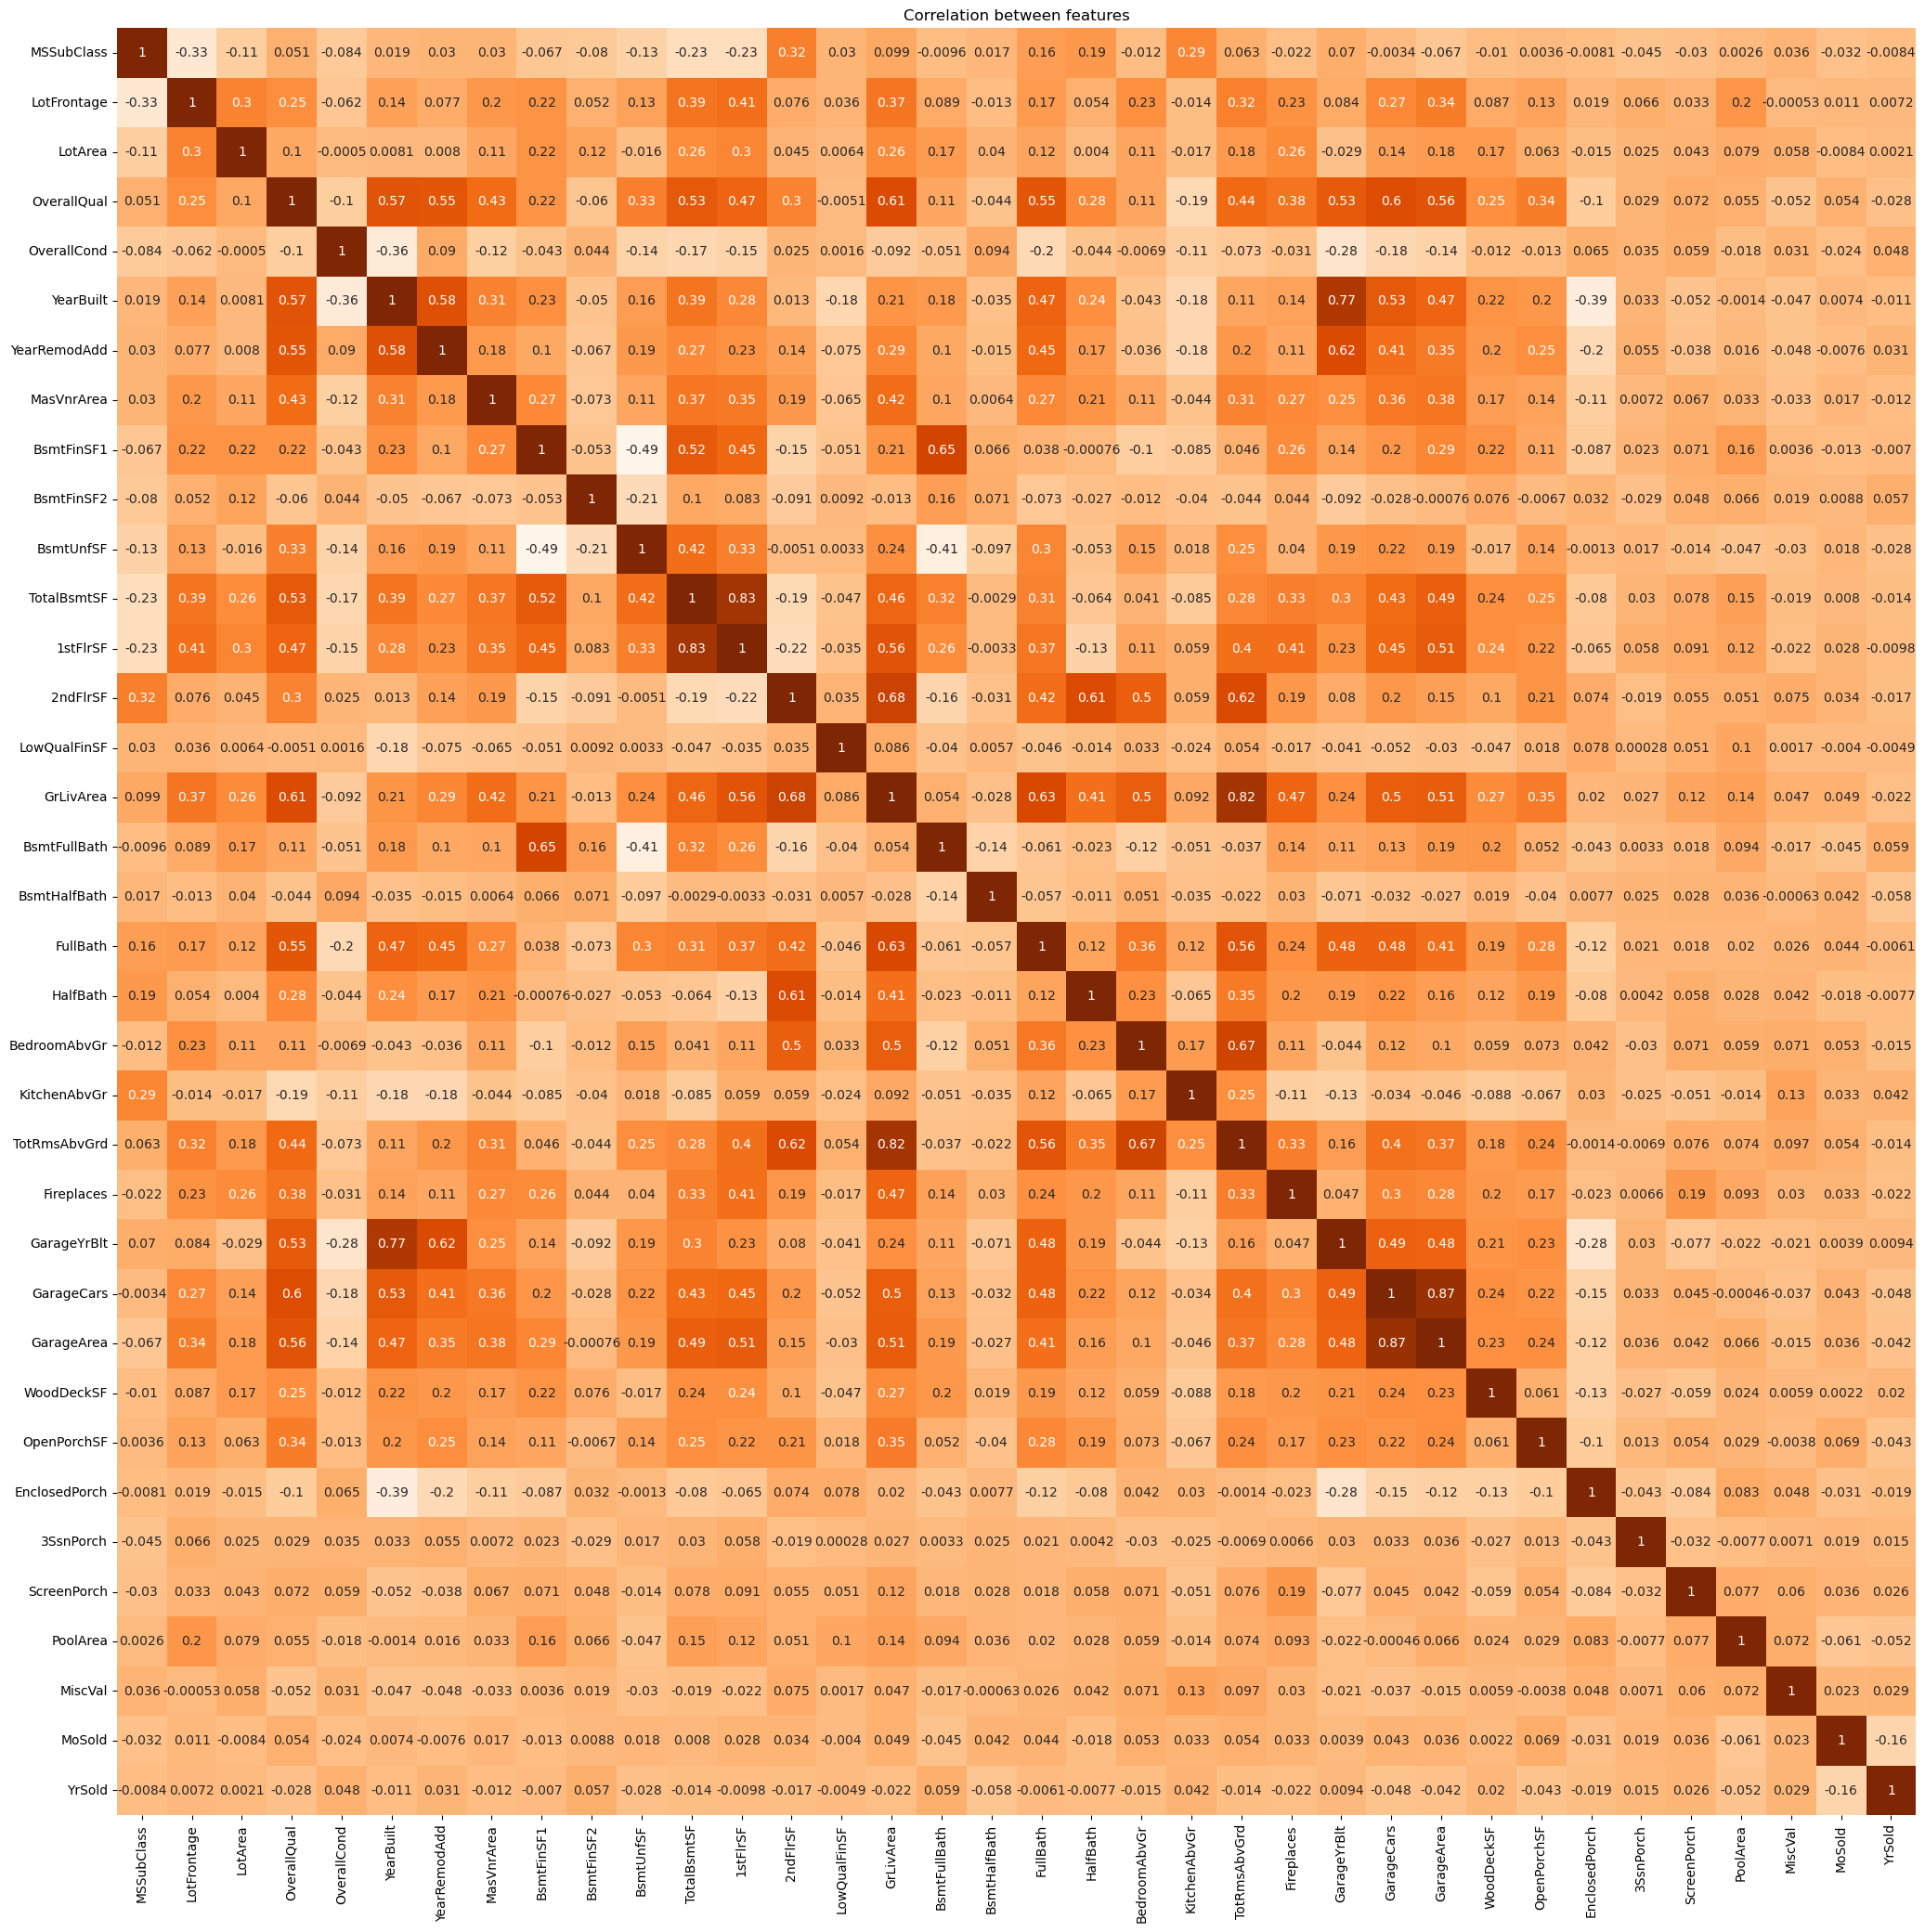

In [14]:
corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

In [15]:
# Based on heatmap above we remove these columns
## Note: Remove one of the two features with a correlation greater than 0.6.
num_data.remove('GarageArea')
num_data.remove('1stFlrSF')
num_data.remove('GrLivArea')
num_data.remove('BsmtFullBath')
num_data.remove('FullBath')
num_data.remove('HalfBath')
num_data.remove('TotRmsAbvGrd')
num_data.remove('GarageYrBlt')

In [16]:
num_preprocessor = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler())

cat_preprocessor = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))

complete_pipeline = ColumnTransformer([
    ('num_pipe',num_preprocessor,num_data),
    ('cat_pipe',cat_preprocessor,cat_data)
])

complete_pipeline

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath',
                                  'BedroomAbvGr', 'Kitchen...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

In [17]:
def prediction(model):
    pipeline = Pipeline([
        ('preprocessor', complete_pipeline),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)  
        
    print(f"{model}")
    print(f"RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE is {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE is {mean_squared_error(y_test, y_pred)}")
    print(f"R2 is {r2_score(y_test, y_pred)}")

In [18]:
# Regressão
prediction(LinearRegression())
print()
# Classificacao
prediction(RandomForestClassifier(random_state=1998))

LinearRegression()
RMSE is 30578.43168977548
MAE is 18367.302368097888
MSE is 935040484.6062653
R2 is 0.8691521414021158

RandomForestClassifier(random_state=1998)
RMSE is 38273.44030894259
MAE is 25160.294520547945
MSE is 1464856233.0821917
R2 is 0.795010692683238


In [19]:
from sklearn.cluster import KMeans

# Selecting numerical columns for clustering
X_cluster = X_train[num_data].copy()

# Imputing missing values
cluster_imputer = SimpleImputer(strategy='mean')
X_cluster = pd.DataFrame(cluster_imputer.fit_transform(X_cluster), columns=X_cluster.columns)

# Scaling the features
scaler = MinMaxScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=1998)
X_cluster['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualizing cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_cluster.columns[:-1])
cluster_centers_df['Cluster'] = range(len(cluster_centers))

cluster_centers_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Cluster
0,56.286472,74.231941,11523.122016,6.915119,5.509284,1988.074271,1999.185676,156.765718,475.458886,31.055703,...,121.068966,68.517241,13.671088,5.185676,16.212202,5.726790e+00,37.665782,7.029178,2006.769231,0
1,51.055156,68.472299,10658.928058,5.076739,5.438849,1949.729017,1961.748201,58.303498,379.148681,57.374101,...,56.256595,24.872902,36.681055,1.045564,15.894484,1.381295e+00,44.508393,6.417266,2007.664269,1
2,60.935829,69.019862,9910.721925,6.427807,5.788770,1979.181818,1997.721925,106.628969,476.034759,49.820856,...,113.288770,48.663102,17.556150,4.352941,14.299465,-1.405126e-15,27.620321,5.526738,2009.077540,2


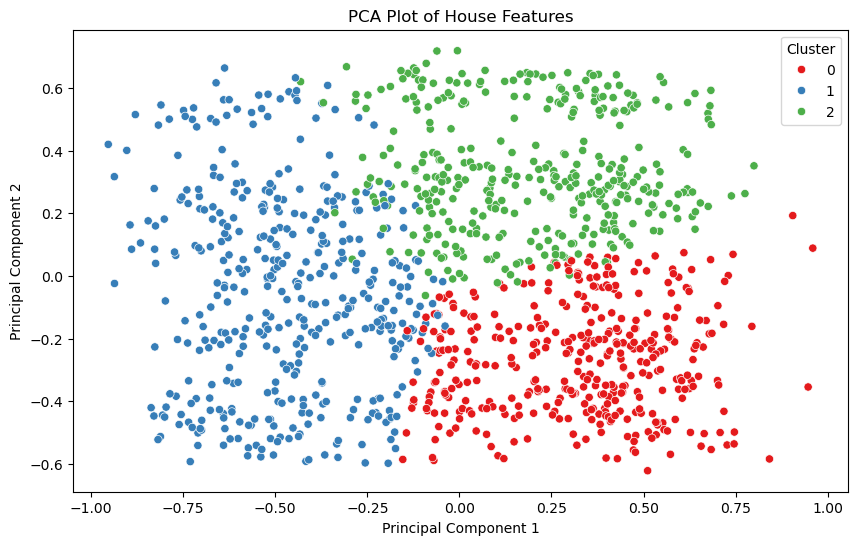

In [20]:
from sklearn.decomposition import PCA

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=1998)
X_pca = pca.fit_transform(X_cluster_scaled)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = X_cluster['Cluster']

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', data=pca_df, palette='Set1', legend='full')
plt.title('PCA Plot of House Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
